# DATA Read

In [1]:
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',None)
import re
import ast
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../Data/MasterData_full_final.xlsx')


# Data Overview

In [3]:
df.head(2)

Unnamed: 0  Unnamed: 0.1  ZoDsFsUpsellTop_display  \
0           0             0                  0.00000   
1           1             1                  0.00000   

   ZoDsFsUpsellTop_displayAttributes ZoDsFsUpsellTop_displayCategory  \
0                                nan                            none   
1                                nan                            none   

  ZoDsFsUpsellTop_placementId  \
0                     wow-top   
1                     wow-top   

                                        ZoDsFsUpsellTop_reason  \
0  fail to get ZO market: The ZipCode has no associated market   
1  fail to get ZO market: The ZipCode has no associated market   

  ZoDsFsUpsellTop_surfaceId ZoDsFsUpsellTop_treatment abbreviatedAddress  \
0                     fshdp                  DISABLED        0 Altura Pl   
1                     fshdp                  DISABLED        0 Diablo Dr   

  adTargets_aamgnrc1 adTargets_city adTargets_cnty  adTargets_dma  \
0        0 Altura Pl        Oakland        Alameda             37   
1        0 Diablo Dr        Oakland        Alameda             37   

   adTargets_fsbid                        adTargets_guid adTargets_listtp  \
0        956.00000  35fff9d5-446b-4be1-8930-031d0522de0a        buy_agent   
1        956.00000  c7bd99aa-f752-4448-b4f8-07a1341ef4fb        buy_agent   

  adTargets_lot  adTargets_mlat  adTargets_mlong  adTargets_pid  \
0             7        37.77644       -122.16184     2075887040   
1             2        37.84723       -122.20044     2068563909   

  adTargets_prange adTargets_premieragent  adTargets_price adTargets_proptp  \
0         600-699k                     no     699000.00000              lot   
1           0-100k                     no      75000.00000              lot   

   adTargets_ssid adTargets_state  adTargets_zip  adTargets_zusr address_city  \
0       956.00000              CA          94605            True      Oakland   
1       956.00000              CA          94611            True      Oakland   

   address_community address_neighborhood address_state address_streetAddress  \
0                nan                  NaN            CA           0 Altura Pl   
1                nan                  NaN            CA           0 Diablo Dr   

  address_subdivision  address_zipcode  \
0                 NaN            94605   
1                 NaN            94611   

  apartmentsForRentInZipcodeSearchUrl_path  attributionInfo_agentEmail  \
0            /oakland-ca-94605/apartments/  maypu888@realtyexperts.com   
1            /oakland-ca-94611/apartments/   dennis.rebroker@gmail.com   

  attributionInfo_agentLicenseNumber attributionInfo_agentName  \
0                           01851688                    May Pu   
1                           01251442             Dennis Serrao   

  attributionInfo_agentPhoneNumber  attributionInfo_attributionTitle  \
0                     510-378-8965                               nan   
1                     925-876-3756                               nan   

  attributionInfo_brokerName attributionInfo_brokerPhoneNumber  \
0             Realty Experts                      510-226-2444   
1        Elation Real Estate                       925-4629175   

   attributionInfo_buyerAgentMemberStateLicense  \
0                                           nan   
1                                           nan   

  attributionInfo_buyerAgentName attributionInfo_buyerBrokerageName  \
0                            NaN                                NaN   
1                            NaN                                NaN   

  attributionInfo_coAgentLicenseNumber attributionInfo_coAgentName  \
0                                  NaN                         NaN   
1                                  NaN                         NaN   

  attributionInfo_coAgentNumber  \
0                           NaN   
1                           NaN   

                                             attributionInfo_infoList1 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Columns: 779 entries, Unnamed: 0 to zipcodeSearchUrl
dtypes: bool(1), float64(336), int64(77), object(365)
memory usage: 9.3+ MB


In [5]:
df.shape

(1561, 779)

# Reducing the Colums

Since the data collected is huge, the no of columns is around 750
We are selecting only 253 Columns with cleaner data

In [6]:
a=['price','stateId','countyId','lotSize','cityId', 'zpid', 'ssid','mlsid', 'favoriteCount','streetAddress', 'city', 'propertyTypeDimension', 'county', 'state', 'zipcode',
   'zestimate', 'rentZestimate', 'yearBuilt', 'homeType', 'homeStatus', 'zipPlusFour','bedrooms', 'bathrooms',
   'longitude', 'latitude', 'hasBadGeocode', 'description', 'livingAreaValue', 'livingAreaUnits', 'lotAreaValue',
   'lotAreaUnits', 'priceHistory', 'lastSoldPrice', 'zestimateLowPercent', 'zestimateHighPercent', 
   'restimateLowPercent', 'restimateHighPercent', 'hideZMA','dateSoldString', 'livingAreaUnitsShort', 
   'taxAssessedValue', 'taxAssessedYear', 'isPreforeclosureAuction', 'monthlyHoaFee', 'propertyTaxRate', 'timeZone', 
   'whatILove', 'isFeatured', 'isListedByOwner', 'isCommunityPillar', 'taxHistory', 'isIncomeRestricted','homeValues',
   'buildingId', 'daysOnZillow', 'schools', 'zillowOfferMarket_code', 'address_streetAddress', 'address_city', 
   'address_state', 'address_zipcode', 'address_neighborhood', 'address_community', 'address_subdivision', 
   'zestimateDeepDiveData_zmaModel_approveDate', 'resoFacts_atAGlanceFacts','resoFacts_bedrooms','resoFacts_bathrooms',
   'resoFacts_bathroomsFull', 'resoFacts_bathroomsThreeQuarter', 'resoFacts_bathroomsHalf', 
   'resoFacts_bathroomsOneQuarter', 'resoFacts_bathroomsPartial', 'resoFacts_mainLevelBathrooms', 
   'resoFacts_rooms', 'resoFacts_basement', 'resoFacts_flooring', 'resoFacts_heating', 'resoFacts_hasHeating', 
   'resoFacts_cooling', 'resoFacts_hasCooling', 'resoFacts_appliances', 'resoFacts_laundryFeatures', 
   'resoFacts_fireplaces', 'resoFacts_fireplaceFeatures', 'resoFacts_hasFireplace', 'resoFacts_furnished', 
   'resoFacts_commonWalls', 'resoFacts_buildingArea', 'resoFacts_livingArea', 'resoFacts_aboveGradeFinishedArea', 
   'resoFacts_belowGradeFinishedArea', 'resoFacts_virtualTour', 'resoFacts_parking', 'resoFacts_parkingFeatures', 
   'resoFacts_garageSpaces', 'resoFacts_coveredSpaces', 'resoFacts_hasAttachedGarage', 'resoFacts_hasGarage', 
   'resoFacts_openParkingSpaces', 'resoFacts_hasOpenParking', 'resoFacts_carportSpaces', 'resoFacts_hasCarport', 
   'resoFacts_otherParking', 'resoFacts_accessibilityFeatures', 'resoFacts_levels', 'resoFacts_stories', 
   'resoFacts_entryLevel', 'resoFacts_entryLocation', 'resoFacts_hasPrivatePool', 'resoFacts_hasSpa', 
   'resoFacts_spaFeatures', 'resoFacts_exteriorFeatures', 'resoFacts_patioAndPorchFeatures', 'resoFacts_fencing', 
   'resoFacts_view', 'resoFacts_hasView', 'resoFacts_hasWaterfrontView', 'resoFacts_waterfrontFeatures', 
   'resoFacts_waterBodyName', 'resoFacts_frontageType', 'resoFacts_frontageLength', 'resoFacts_topography', 
   'resoFacts_woodedArea', 'resoFacts_vegetation', 'resoFacts_canRaiseHorses', 'resoFacts_lotSize', 
   'resoFacts_lotSizeDimensions', 'resoFacts_otherStructures', 'resoFacts_additionalParcelsDescription', 
   'resoFacts_hasAdditionalParcels', 'resoFacts_parcelNumber', 'resoFacts_hasAttachedProperty', 
   'resoFacts_hasLandLease', 'resoFacts_landLeaseAmount', 'resoFacts_zoning', 'resoFacts_zoningDescription',
   'resoFacts_homeType', 'resoFacts_architecturalStyle', 'resoFacts_constructionMaterials', 
   'resoFacts_foundationDetails', 'resoFacts_roofType', 'resoFacts_windowFeatures', 'resoFacts_propertyCondition', 
   'resoFacts_isNewConstruction', 'resoFacts_yearBuilt', 'resoFacts_developmentStatus', 'resoFacts_yearBuiltEffective',
   'resoFacts_onMarketDate', 'resoFacts_builderModel', 'resoFacts_builderName', 'resoFacts_hasHomeWarranty', 
   'resoFacts_electric', 'resoFacts_hasElectricOnProperty', 'resoFacts_gas', 'resoFacts_sewer', 
   'resoFacts_waterSources', 'resoFacts_utilities', 'resoFacts_greenBuildingVerificationType', 
   'resoFacts_greenEnergyEfficient', 'resoFacts_greenIndoorAirQuality', 'resoFacts_greenSustainability', 
   'resoFacts_greenWaterConservation', 'resoFacts_numberOfUnitsInCommunity', 'resoFacts_numberOfUnitsVacant', 
   'resoFacts_storiesTotal', 'resoFacts_allowedPets', 'resoFacts_hasPetsAllowed', 'resoFacts_hasRentControl', 
   'resoFacts_buildingFeatures', 'resoFacts_structureType', 'resoFacts_buildingName', 'resoFacts_elementarySchool',
   'resoFacts_elementarySchoolDistrict', 'resoFacts_middleOrJuniorSchool', 'resoFacts_middleOrJuniorSchoolDistrict', 
   'resoFacts_highSchool', 'resoFacts_highSchoolDistrict', 'resoFacts_securityFeatures',
   'resoFacts_communityFeatures', 'resoFacts_isSeniorCommunity', 'resoFacts_cityRegion', 'resoFacts_associationFee', 
   'resoFacts_hasAssociation', 'resoFacts_associationAmenities', 'resoFacts_associationFeeIncludes', 
   'resoFacts_associationName', 'resoFacts_associationPhone', 'resoFacts_associationFee2', 
   'resoFacts_associationName2', 'resoFacts_associationPhone2', 'resoFacts_taxAnnualAmount', 'resoFacts_listingId', 
   'resoFacts_buildingAreaSource', 'resoFacts_specialListingConditions', 'resoFacts_availabilityDate', 
   'resoFacts_basementYN', 'resoFacts_buyerAgencyCompensation', 'resoFacts_buyerAgencyCompensationType', 
   'resoFacts_doorFeatures', 'resoFacts_interiorFeatures', 'resoFacts_leaseTerm', 'resoFacts_lotFeatures', 'resoFacts_mainLevelBedrooms', 
   'resoFacts_otherEquipment', 'resoFacts_poolFeatures', 'resoFacts_propertySubType', 'resoFacts_virtualTourURLUnbranded',
   'resoFacts_waterViewYN', 'resoFacts_waterView', 'resoFacts_livingAreaRange', 'resoFacts_livingAreaRangeUnits', 
   'resoFacts_exclusions', 'resoFacts_landLeaseExpirationDate', 'resoFacts_subdivisionName', 'resoFacts_attic', 
   'resoFacts_bodyType', 'resoFacts_cropsIncludedYN', 'resoFacts_elevation', 'resoFacts_elevationUnits', 
   'resoFacts_foundationArea', 'resoFacts_horseAmenities', 'resoFacts_horseYN', 'resoFacts_inclusions', 
   'resoFacts_incomeIncludes', 'resoFacts_irrigationWaterRightsAcres', 'resoFacts_irrigationWaterRightsYN', 
   'resoFacts_listingTerms', 'resoFacts_ownership', 'resoFacts_ownershipType', 'resoFacts_roadSurfaceType', 
   'resoFacts_tenantPays', 'resoFacts_totalActualRent', 'resoFacts_waterSource', 'resoFacts_petsMaxWeight', 
   'resoFacts_municipality', 'resoFacts_pricePerSquareFoot', 'resoFacts_marketingType', 'resoFacts_depositsAndFees', 
   'resoFacts_daysOnZillow', 'resoFacts_hoaFee', 'resoFacts_offerReviewDate', 'resoFacts_otherFacts', 
   'resoFacts_listAOR', 'solarPotential_sunScore', 'solarPotential_buildFactor', 'solarPotential_climateFactor', 
   'solarPotential_electricityFactor', 'solarPotential_solarFactor', 'mortgageRates_thirtyYearFixedRate', 
   'mortgageRates_fifteenYearFixedRate', 'mortgageRates_arm5Rate', 'parentRegion_name']




In [7]:
df = df[a]

In [8]:
df.shape

(1561, 253)

# Data Duplication Check

In [9]:
df.duplicated().any()

False

# Feature Selection using pearson correlation coefficient

In [10]:
df_corr = df.corr()

In [11]:
#df_corr.to_excel("../df_correlation_mini.xlsx")

In [12]:
#dropping the columsn with null values
df.drop(['stateId','hideZMA','isCommunityPillar','isIncomeRestricted','homeValues','zillowOfferMarket_code','address_community','resoFacts_bathroomsThreeQuarter','resoFacts_bathroomsOneQuarter','resoFacts_furnished','resoFacts_aboveGradeFinishedArea','resoFacts_belowGradeFinishedArea','resoFacts_otherParking','resoFacts_entryLevel','resoFacts_hasWaterfrontView','resoFacts_waterBodyName','resoFacts_frontageLength','resoFacts_topography','resoFacts_woodedArea','resoFacts_additionalParcelsDescription','resoFacts_hasAdditionalParcels','resoFacts_landLeaseAmount','resoFacts_yearBuiltEffective','resoFacts_builderModel','resoFacts_waterSources','resoFacts_greenIndoorAirQuality','resoFacts_greenSustainability','resoFacts_hasRentControl','resoFacts_isSeniorCommunity','resoFacts_associationFee2','resoFacts_associationPhone2','resoFacts_listingId','resoFacts_basementYN','resoFacts_livingAreaRange','resoFacts_livingAreaRangeUnits','resoFacts_exclusions','resoFacts_landLeaseExpirationDate','resoFacts_cropsIncludedYN','resoFacts_elevation','resoFacts_foundationArea','resoFacts_incomeIncludes','resoFacts_irrigationWaterRightsAcres','resoFacts_irrigationWaterRightsYN','resoFacts_availabilityDate','resoFacts_ownershipType','resoFacts_petsMaxWeight','resoFacts_municipality','resoFacts_marketingType','resoFacts_offerReviewDate'],axis=1,inplace=True)








In [13]:
df.shape

(1561, 204)

running the correlation again and this time we are selecting columns whose correlation co.eff value is greater than 0.1 with respect to z_estimate(since we are predicting z_estimate)

In [14]:
df_corr = df.corr()
#df_corr.to_excel("../df_correlation_mini.xlsx")

In [15]:
b=['price','solarPotential_electricityFactor','zestimate','zestimateDeepDiveData_zmaModel_approveDate','resoFacts_mainLevelBathrooms','rentZestimate','livingAreaValue','lastSoldPrice','taxAssessedValue','mortgageRates_fifteenYearFixedRate','resoFacts_mainLevelBedrooms','resoFacts_taxAnnualAmount','mortgageRates_arm5Rate','bathrooms','resoFacts_bathroomsFull','resoFacts_pricePerSquareFoot','bedrooms','resoFacts_fireplaces','monthlyHoaFee','resoFacts_depositsAndFees','restimateLowPercent','resoFacts_numberOfUnitsVacant','restimateHighPercent','resoFacts_hasAttachedGarage','resoFacts_numberOfUnitsInCommunity','propertyTaxRate','resoFacts_horseYN','resoFacts_parking','county','taxAssessedYear','zipcode','address_zipcode','resoFacts_bathroomsHalf','resoFacts_hasView','resoFacts_hasAssociation','resoFacts_hasFireplace','resoFacts_storiesTotal','mortgageRates_thirtyYearFixedRate','resoFacts_canRaiseHorses','resoFacts_hasCarport','resoFacts_stories','resoFacts_hasPrivatePool','resoFacts_garageSpaces','solarPotential_solarFactor','resoFacts_waterViewYN','zestimateHighPercent','resoFacts_hasAttachedProperty','lotSize','city','propertyTypeDimension','description','schools']



df=df[b]


In [16]:
df=df[b]

In [17]:
df.shape

(1561, 52)

In [18]:
df.isnull().sum().sum()

24496

# Categorical classification

In [19]:
df_cat= df.select_dtypes(exclude='number')
print(df_cat.shape)

(1561, 5)


In [20]:
print(df_cat.isnull().sum())

county                   0
city                     0
propertyTypeDimension    0
description              6
schools                  3
dtype: int64


# Handling Null Data with mode

In [21]:
for column in df_cat:
    df_cat[column].fillna(df_cat[column].mode()[0], inplace=True)

/Users/manogna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
print(df_cat.isnull().sum().sum())

0


# Numeric data classification

In [23]:
df_num= df.select_dtypes(include='number')
print(df_num.shape)

(1561, 47)


In [24]:
df_num.isnull().sum()

price                                            0
solarPotential_electricityFactor               254
zestimate                                      286
zestimateDeepDiveData_zmaModel_approveDate    1544
resoFacts_mainLevelBathrooms                  1558
rentZestimate                                  173
livingAreaValue                                 31
lastSoldPrice                                  405
taxAssessedValue                               228
mortgageRates_fifteenYearFixedRate             209
resoFacts_mainLevelBedrooms                   1558
resoFacts_taxAnnualAmount                      858
mortgageRates_arm5Rate                         209
bathrooms                                       31
resoFacts_bathroomsFull                         59
resoFacts_pricePerSquareFoot                    61
bedrooms                                        61
resoFacts_fireplaces                           687
monthlyHoaFee                                  950
resoFacts_depositsAndFees      

# Dealing with numeric data null values

In [25]:
#replacing null values in zestimate with price values
df_num['zestimate'].fillna(df_num['price'],inplace=True)

In [26]:
#dropping price column, since we should not feed it to the mode
df.drop('price',axis=1,inplace=True)
df_num.drop('price',axis=1,inplace=True)

/Users/manogna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_num.resoFacts_hasFireplace.value_counts()

1.00000    866
0.00000    434
Name: resoFacts_hasFireplace, dtype: int64

In [28]:
df_num['resoFacts_hasFireplace'].fillna(0, inplace=True)

In [29]:
#for column in df_num:
#    df_num[column].fillna(df_num[column].mode()[0], inplace=True)

In [30]:
from sklearn.impute import KNNImputer   # missing values imputation

imputer = KNNImputer(n_neighbors=2)  #impute missing values
df_num.iloc[:,0:]=imputer.fit_transform(df_num.iloc[:,0:]) #replace df with imputed missing values

/Users/manogna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [31]:
print(df_num.isnull().sum().sum())

0


In [32]:
print(df_cat.shape)
print(df_num.shape)


(1561, 5)
(1561, 46)


In [33]:
df_num['resoFacts_parking']=np.where(df_num['resoFacts_parking']>=1,1,0)

<ipython-input-33-faed6df45a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['resoFacts_parking']=np.where(df_num['resoFacts_parking']>=1,1,0)


In [34]:
df_num.resoFacts_parking.value_counts()

1    914
0    647
Name: resoFacts_parking, dtype: int64

In [35]:
df= pd.concat([df_cat,df_num], axis=1)  # this df is without null values

In [36]:
print(df.shape)
print(df.isnull().sum().sum())

(1561, 51)
0


# Feature Engineering- Creating 6 features out of school

In [37]:
schools= list(df['schools'])

In [38]:
print(schools)

["[{'distance': 0.7, 'name': 'Parker Elementary', 'rating': 3, 'level': 'Elementary', 'studentsPerTeacher': 20, 'assigned': None, 'grades': 'K-8', 'link': 'https://www.greatschools.org/school?id=00249&state=CA', 'type': 'Public', 'size': 314, 'totalCount': 1, 'isAssigned': True}]", "[{'distance': 1, 'name': 'Thornhill Elementary', 'rating': 8, 'level': 'Elementary', 'studentsPerTeacher': 19, 'assigned': None, 'grades': 'K-5', 'link': 'https://www.greatschools.org/school?id=00264&state=CA', 'type': 'Public', 'size': 410, 'totalCount': 1, 'isAssigned': True}, {'distance': 1.7, 'name': 'Montera Middle', 'rating': 4, 'level': 'Middle', 'studentsPerTeacher': 17, 'assigned': None, 'grades': '6-8', 'link': 'https://www.greatschools.org/school?id=00244&state=CA', 'type': 'Public', 'size': 727, 'totalCount': 1, 'isAssigned': True}, {'distance': 3.5, 'name': 'Oakland Technical High', 'rating': 7, 'level': 'High', 'studentsPerTeacher': 19, 'assigned': None, 'grades': '9-12', 'link': 'https://www.

In [39]:
list_schools= [[]] * len(schools)

In [40]:
len(list_schools)

1561

In [41]:
i=0
for x in schools:
    list_schools[i]=[0,0,0,0,0,0]
    x = str(x).replace('\\','"')
    l=re.findall("[{][\\a-zA-z0-9:',\-/ \.=?&]+[}]", x)
    for y in l:
        y=ast.literal_eval(y)
        if y['level']== 'Elementary':
            if y['rating']!=None:
                if list_schools[i][1]<y['rating']:
                    list_schools[i][1]=y['rating']
                    list_schools[i][0]=y['distance']
                
        if y['level']== 'Middle':
            if y['rating']!=None:
                if list_schools[i][3]<y['rating']:
                    list_schools[i][3]=y['rating']
                    list_schools[i][2]=y['distance']
        if y['level']=='High':
            if y['rating']!=None:
                if list_schools[i][5]<y['rating']:
                    list_schools[i][5]=y['rating']
                    list_schools[i][4]=y['distance']
    
    i+=1

In [42]:
list_schools[0]

[0.7, 3, 0, 0, 0, 0]

In [43]:
for i in range(len(list_schools)):
    list_schools[i] = [None if item <=0 else item for item in list_schools[i]]

In [44]:
df_3 = pd.DataFrame(list_schools, columns = ['Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance', 'Middle_Ratings', 'High_Distance', 'High_Ratings'])

In [45]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.70000,3.00000,nan,nan,nan,nan
1,1.00000,8.00000,1.70000,4.00000,3.50000,7.00000
2,nan,nan,nan,nan,nan,nan
3,2.20000,9.00000,2.30000,9.00000,2.20000,10.00000
4,1.40000,7.00000,1.40000,7.00000,1.00000,9.00000
5,1.00000,8.00000,1.10000,8.00000,3.10000,9.00000
6,0.60000,8.00000,nan,nan,0.50000,1.00000
7,0.30000,2.00000,0.90000,2.00000,0.50000,7.00000
8,0.50000,3.00000,nan,nan,nan,nan
9,1.60000,5.00000,2.60000,3.00000,nan,nan


In [46]:
df_3['Elementary_Distance']=np.where(np.isnan(df_3['Elementary_Distance']),df_3['Elementary_Distance'].median(),df_3['Elementary_Distance'])
df_3['Elementary_Ratings']=np.where(np.isnan(df_3['Elementary_Ratings']),df_3['Elementary_Ratings'].median(),df_3['Elementary_Ratings'])
df_3['Middle_Ratings']=np.where(np.isnan(df_3['Middle_Ratings']),df_3['Middle_Ratings'].mode(),df_3['Middle_Ratings']) 
df_3['Middle_Distance']=np.where(np.isnan(df_3['Middle_Distance']),df_3['Middle_Distance'].median(),df_3['Middle_Distance']) 
df_3['High_Ratings']=np.where(np.isnan(df_3['High_Ratings']),df_3['High_Ratings'].mode(),df_3['High_Ratings']) 
df_3['High_Distance']=np.where(np.isnan(df_3['High_Distance']),df_3['High_Distance'].median(),df_3['High_Distance']) 


In [47]:
#imputer = KNNImputer(n_neighbors=2)  #impute missing values
#df_3.iloc[:,0:]=imputer.fit_transform(df_3.iloc[:,0:]) #replace df with imputed missing values

In [48]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.70000,3.00000,1.00000,3.00000,1.00000,7.00000
1,1.00000,8.00000,1.70000,4.00000,3.50000,7.00000
2,0.50000,5.00000,1.00000,3.00000,1.00000,7.00000
3,2.20000,9.00000,2.30000,9.00000,2.20000,10.00000
4,1.40000,7.00000,1.40000,7.00000,1.00000,9.00000
5,1.00000,8.00000,1.10000,8.00000,3.10000,9.00000
6,0.60000,8.00000,1.00000,3.00000,0.50000,1.00000
7,0.30000,2.00000,0.90000,2.00000,0.50000,7.00000
8,0.50000,3.00000,1.00000,3.00000,1.00000,7.00000
9,1.60000,5.00000,2.60000,3.00000,1.00000,7.00000


In [49]:
df_3.shape

(1561, 6)

In [50]:
df_3.isnull().sum()

Elementary_Distance    0
Elementary_Ratings     0
Middle_Distance        0
Middle_Ratings         0
High_Distance          0
High_Ratings           0
dtype: int64

In [51]:
df.shape

(1561, 51)

In [52]:
df.drop('schools',axis=1,inplace=True)

In [53]:
df.shape

(1561, 50)

In [54]:
#df=df.reset_index()

In [55]:
df=pd.concat([df,df_3],axis=1)

In [56]:
df.shape  #57=52-1+6

(1561, 56)

In [57]:
df.isnull().sum().sum()

0

In [58]:
#replacing the school column with 6 new columns created now in categorical data

df_cat.columns

Index(['county', 'city', 'propertyTypeDimension', 'description', 'schools'], dtype='object')

In [59]:
df_cat.drop('schools',axis=1,inplace=True)

In [60]:
#df_cat=pd.concat([df_cat,df_3],axis=1)

In [61]:
df_num=pd.concat([df_num,df_3],axis=1)

In [62]:
print(df_cat.shape)
print(df_num.shape)


(1561, 4)
(1561, 52)


# Outliers

In [63]:
#we are just looking for outliers but not dealing with outliers

In [64]:
#columns_for_outliers= ['bedrooms','bathrooms','lastSoldPrice','Elementary_Ratings','Elementary_Distance',
#                     'Middle_Ratings','Middle_Distance', 'High_Distance', 'High_Ratings','lotSize',
#                     'livingAreaValue','resoFacts_hasGarage']

In [65]:
# Detecting outliers and imputing nan 
#from scipy.stats import skew
#
#for x in columns_for_outliers:
#        percentile25 = df[x].quantile(0.25)
#        percentile75 = df[x].quantile(0.75)
#        iqr= percentile75-percentile25
#        upper = percentile75 + 1.5 * iqr
#        lower = percentile25 - 1.5 * iqr
#        for y in df[x]:
#            if (y>upper) or (y<lower):
#                df[x].loc[df[x] == y]=None

In [66]:
#df.isnull().sum()

#The below are the outliers in the dataset

#livingAreaValue                                93

#lastSoldPrice                                  58

#bathrooms                                     101

#bedrooms                                       14

#lotSize                                       158

#Elementary_Distance                           109

#Middle_Distance                               140

#High_Distance                                 120

#High_Ratings                                   33

# Removing Multi-Colinearity

In [67]:
df_num.columns

Index(['solarPotential_electricityFactor', 'zestimate',
       'zestimateDeepDiveData_zmaModel_approveDate',
       'resoFacts_mainLevelBathrooms', 'rentZestimate', 'livingAreaValue',
       'lastSoldPrice', 'taxAssessedValue',
       'mortgageRates_fifteenYearFixedRate', 'resoFacts_mainLevelBedrooms',
       'resoFacts_taxAnnualAmount', 'mortgageRates_arm5Rate', 'bathrooms',
       'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot', 'bedrooms',
       'resoFacts_fireplaces', 'monthlyHoaFee', 'resoFacts_depositsAndFees',
       'restimateLowPercent', 'resoFacts_numberOfUnitsVacant',
       'restimateHighPercent', 'resoFacts_hasAttachedGarage',
       'resoFacts_numberOfUnitsInCommunity', 'propertyTaxRate',
       'resoFacts_horseYN', 'resoFacts_parking', 'taxAssessedYear', 'zipcode',
       'address_zipcode', 'resoFacts_bathroomsHalf', 'resoFacts_hasView',
       'resoFacts_hasAssociation', 'resoFacts_hasFireplace',
       'resoFacts_storiesTotal', 'mortgageRates_thirtyYearFixed

In [68]:
vif_columns=['solarPotential_electricityFactor', 'zestimate',
       'zestimateDeepDiveData_zmaModel_approveDate',
       'resoFacts_mainLevelBathrooms', 'rentZestimate', 'livingAreaValue',
       'lastSoldPrice', 'taxAssessedValue',
       'mortgageRates_fifteenYearFixedRate', 'resoFacts_mainLevelBedrooms',
       'resoFacts_taxAnnualAmount', 'mortgageRates_arm5Rate', 'bathrooms',
       'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot', 'bedrooms',
       'resoFacts_fireplaces', 'monthlyHoaFee', 'resoFacts_depositsAndFees',
       'restimateLowPercent', 'resoFacts_numberOfUnitsVacant',
       'restimateHighPercent', 'resoFacts_hasAttachedGarage',
       'resoFacts_numberOfUnitsInCommunity', 'propertyTaxRate',
       'resoFacts_horseYN', 'resoFacts_parking', 'taxAssessedYear', 'zipcode',
       'address_zipcode', 'resoFacts_bathroomsHalf', 'resoFacts_hasView',
       'resoFacts_hasAssociation', 'resoFacts_hasFireplace',
       'resoFacts_storiesTotal', 'mortgageRates_thirtyYearFixedRate',
       'resoFacts_canRaiseHorses', 'resoFacts_hasCarport', 'resoFacts_stories',
       'resoFacts_hasPrivatePool', 'resoFacts_garageSpaces',
       'solarPotential_solarFactor', 'resoFacts_waterViewYN',
       'zestimateHighPercent', 'resoFacts_hasAttachedProperty', 'lotSize',
       'Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance',
       'Middle_Ratings', 'High_Distance', 'High_Ratings']

In [69]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = vif_columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [70]:
m= df.loc[:,vif_columns] 
calc_vif(m)

,variables,VIF
0,solarPotential_electricityFactor,0.00000
1,zestimate,6.66116
2,zestimateDeepDiveData_zmaModel_approveDate,2.79071
3,resoFacts_mainLevelBathrooms,13.32417
4,rentZestimate,3.89052
5,livingAreaValue,3.18691
6,lastSoldPrice,3.40270
7,taxAssessedValue,81.57890
8,mortgageRates_fifteenYearFixedRate,27.36578
9,resoFacts_mainLevelBedrooms,9.73194


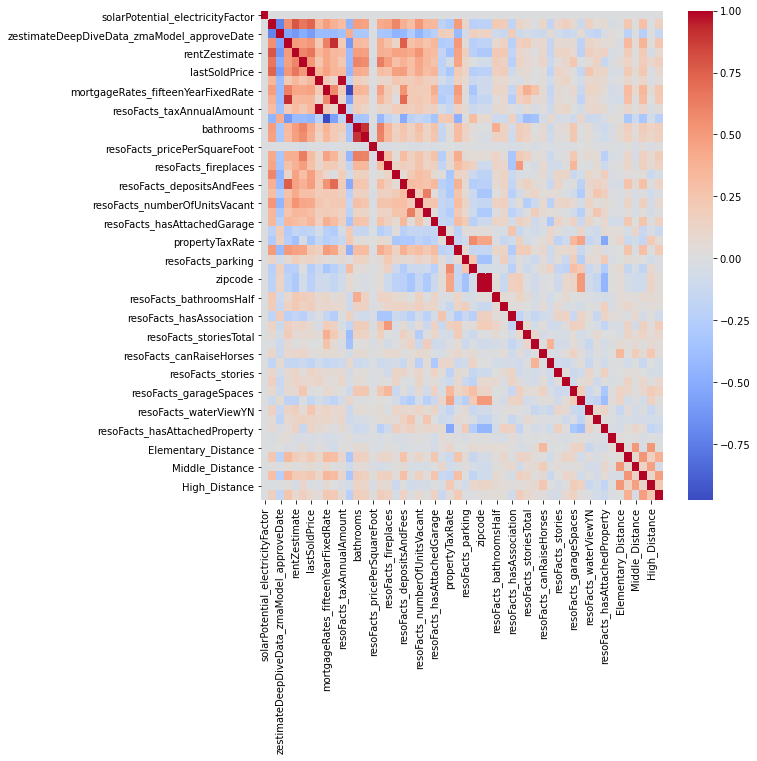

In [71]:
import pandas as pd
from seaborn import heatmap

corr = df[vif_columns].corr() # train is a pandas dataframe 

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [72]:
#In order to remove multi colineraity, we should remove the columns with
#with VIF more than 12.5


In [73]:
#not dropping zestimate since we wont be using zestimate to feed the model
df.drop(['resoFacts_mainLevelBathrooms','taxAssessedValue','resoFacts_taxAnnualAmount','mortgageRates_fifteenYearFixedRate','mortgageRates_arm5Rate','address_zipcode'],axis=1,inplace=True)
df_num.drop(['resoFacts_mainLevelBathrooms','taxAssessedValue','resoFacts_taxAnnualAmount','mortgageRates_fifteenYearFixedRate','mortgageRates_arm5Rate','address_zipcode',],axis=1,inplace=True)


In [74]:
df_num.columns

Index(['solarPotential_electricityFactor', 'zestimate',
       'zestimateDeepDiveData_zmaModel_approveDate', 'rentZestimate',
       'livingAreaValue', 'lastSoldPrice', 'resoFacts_mainLevelBedrooms',
       'bathrooms', 'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot',
       'bedrooms', 'resoFacts_fireplaces', 'monthlyHoaFee',
       'resoFacts_depositsAndFees', 'restimateLowPercent',
       'resoFacts_numberOfUnitsVacant', 'restimateHighPercent',
       'resoFacts_hasAttachedGarage', 'resoFacts_numberOfUnitsInCommunity',
       'propertyTaxRate', 'resoFacts_horseYN', 'resoFacts_parking',
       'taxAssessedYear', 'zipcode', 'resoFacts_bathroomsHalf',
       'resoFacts_hasView', 'resoFacts_hasAssociation',
       'resoFacts_hasFireplace', 'resoFacts_storiesTotal',
       'mortgageRates_thirtyYearFixedRate', 'resoFacts_canRaiseHorses',
       'resoFacts_hasCarport', 'resoFacts_stories', 'resoFacts_hasPrivatePool',
       'resoFacts_garageSpaces', 'solarPotential_solarFactor',


In [75]:
vif_columns=['solarPotential_electricityFactor', 'zestimate',
       'zestimateDeepDiveData_zmaModel_approveDate',
       'rentZestimate', 'livingAreaValue',
       'lastSoldPrice', 'resoFacts_mainLevelBedrooms', 'bathrooms',
       'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot', 'bedrooms',
       'resoFacts_fireplaces', 'monthlyHoaFee', 'resoFacts_depositsAndFees',
       'restimateLowPercent', 'resoFacts_numberOfUnitsVacant',
       'restimateHighPercent', 'resoFacts_hasAttachedGarage',
       'resoFacts_numberOfUnitsInCommunity', 'propertyTaxRate',
       'resoFacts_horseYN', 'resoFacts_parking', 'taxAssessedYear', 'zipcode',
       'resoFacts_bathroomsHalf', 'resoFacts_hasView',
       'resoFacts_hasAssociation', 'resoFacts_hasFireplace',
       'resoFacts_storiesTotal', 'mortgageRates_thirtyYearFixedRate',
       'resoFacts_canRaiseHorses', 'resoFacts_hasCarport', 'resoFacts_stories',
       'resoFacts_hasPrivatePool', 'resoFacts_garageSpaces',
       'solarPotential_solarFactor', 'resoFacts_waterViewYN',
       'zestimateHighPercent', 'resoFacts_hasAttachedProperty', 'lotSize',
       'Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance',
       'Middle_Ratings', 'High_Distance', 'High_Ratings']

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = vif_columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [77]:
m= df.loc[:,vif_columns] 
calc_vif(m)

,variables,VIF
0,solarPotential_electricityFactor,0.00000
1,zestimate,6.45879
2,zestimateDeepDiveData_zmaModel_approveDate,2.51107
3,rentZestimate,3.82744
4,livingAreaValue,3.17302
5,lastSoldPrice,3.25501
6,resoFacts_mainLevelBedrooms,2.59052
7,bathrooms,10.06505
8,resoFacts_bathroomsFull,7.69113
9,resoFacts_pricePerSquareFoot,1.01676


# TRAIN & TEST SPLITTING

In [78]:
y = df.zestimate

In [79]:
x= df.drop('zestimate', axis=1)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=123)

In [81]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1248, 49)
(1248,)
(313, 49)
(313,)


# One Hot Encoding

In [82]:
df_cat.columns

Index(['county', 'city', 'propertyTypeDimension', 'description'], dtype='object')

In [83]:
df_cat.shape

(1561, 4)

In [84]:
cat_columns=['city', 'county','propertyTypeDimension']

In [85]:
from scipy.sparse import coo_matrix

X_train_cat_processed = coo_matrix((1248, 0))
X_test_cat_processed = coo_matrix((313, 0))

In [86]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

from sklearn import preprocessing
vectorizer= preprocessing.OneHotEncoder(handle_unknown = 'ignore')
for x in cat_columns:
    
    
# 1. INSTANTIATE
    
    one_hot_train = vectorizer.fit_transform(X_train[x].values.reshape(-1,1))
    one_hot_test = vectorizer.transform(X_test[x].values.reshape(-1,1))
    vectorizer.get_feature_names()
    
    X_train_cat_processed= hstack((X_train_cat_processed,one_hot_train)).tocsr()
    X_test_cat_processed= hstack((X_test_cat_processed,one_hot_test)).tocsr()

In [87]:
print(X_train_cat_processed.shape)
print(X_test_cat_processed.shape)

(1248, 28)
(313, 28)


# Numeric Data Preparation

In [88]:
df_num.columns

Index(['solarPotential_electricityFactor', 'zestimate',
       'zestimateDeepDiveData_zmaModel_approveDate', 'rentZestimate',
       'livingAreaValue', 'lastSoldPrice', 'resoFacts_mainLevelBedrooms',
       'bathrooms', 'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot',
       'bedrooms', 'resoFacts_fireplaces', 'monthlyHoaFee',
       'resoFacts_depositsAndFees', 'restimateLowPercent',
       'resoFacts_numberOfUnitsVacant', 'restimateHighPercent',
       'resoFacts_hasAttachedGarage', 'resoFacts_numberOfUnitsInCommunity',
       'propertyTaxRate', 'resoFacts_horseYN', 'resoFacts_parking',
       'taxAssessedYear', 'zipcode', 'resoFacts_bathroomsHalf',
       'resoFacts_hasView', 'resoFacts_hasAssociation',
       'resoFacts_hasFireplace', 'resoFacts_storiesTotal',
       'mortgageRates_thirtyYearFixedRate', 'resoFacts_canRaiseHorses',
       'resoFacts_hasCarport', 'resoFacts_stories', 'resoFacts_hasPrivatePool',
       'resoFacts_garageSpaces', 'solarPotential_solarFactor',


In [89]:
df_num.shape

(1561, 46)

In [90]:
from scipy.sparse import coo_matrix

X_train_num_processed = coo_matrix((1248,0))
X_test_num_processed = coo_matrix((313,0))

In [91]:
#not using zestimate and zestimateDeepDiveData_zmaModel_approveDate since we are predicting 
#zestimate and zestimateDeepDiveData_zmaModel_approveDate is related to zestimate.
num_cols=['solarPotential_electricityFactor',
       'rentZestimate', 'livingAreaValue',
       'lastSoldPrice', 'resoFacts_mainLevelBedrooms', 'bathrooms',
       'resoFacts_bathroomsFull', 'resoFacts_pricePerSquareFoot', 'bedrooms',
       'resoFacts_fireplaces', 'monthlyHoaFee', 'resoFacts_depositsAndFees',
       'restimateLowPercent', 'resoFacts_numberOfUnitsVacant',
       'restimateHighPercent', 'resoFacts_hasAttachedGarage',
       'resoFacts_numberOfUnitsInCommunity', 'propertyTaxRate',
       'resoFacts_horseYN', 'resoFacts_parking', 'taxAssessedYear', 'zipcode',
       'resoFacts_bathroomsHalf', 'resoFacts_hasView',
       'resoFacts_hasAssociation', 'resoFacts_hasFireplace',
       'resoFacts_storiesTotal', 'mortgageRates_thirtyYearFixedRate',
       'resoFacts_canRaiseHorses', 'resoFacts_hasCarport', 'resoFacts_stories',
       'resoFacts_hasPrivatePool', 'resoFacts_garageSpaces',
       'solarPotential_solarFactor', 'resoFacts_waterViewYN',
       'zestimateHighPercent', 'resoFacts_hasAttachedProperty', 'lotSize',
       'Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance',
       'Middle_Ratings', 'High_Distance', 'High_Ratings']

# Data rescaling/standardising for numeric values

In [92]:
#vectorize all numerical feature
#for x in num_cols:
#    from sklearn.preprocessing import StandardScaler
#
#    stand_scalar = StandardScaler()
#    stand_scalar.fit(X_train[x].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#    print(f"Mean : {stand_scalar.mean_[0]}, Standard deviation : {np.sqrt(stand_scalar.var_[0])}")
#
#    # Now standardize the data with above mean and variance.
#    scaled_train = stand_scalar.transform(X_train[x].values.reshape(-1, 1))
#
#    scaled_test = stand_scalar.transform(X_test[x].values.reshape(-1, 1))
#
#    
#    X_train_num_processed= hstack((X_train_num_processed,scaled_train)).tocsr()
#    X_test_num_processed= hstack((X_test_num_processed,scaled_test)).tocsr()
#
#

In [93]:
#print(X_train_num_processed.shape)
#print(X_test_num_processed.shape)

# Linear Regression

In [94]:
#from scipy.sparse import hstack
#X_train_processed = hstack((X_train_cat_processed,X_train_num_processed)).tocsr()
#X_test_processed = hstack(( X_test_cat_processed,X_test_num_processed)).tocsr()
#print(X_test_processed.shape)
#print(X_train_processed.shape)

In [95]:
#Y_train_s= (Y_train-np.mean(Y_train))/np.std(Y_train)
#Y_test_s= (Y_test-np.mean(Y_test))/np.std(Y_test)

In [96]:
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
#regressor.fit(X_train_processed, Y_train_s)

In [97]:
#Y_pred = regressor.predict(X_test_processed)

In [98]:
#df_out = pd.DataFrame({'Actual': Y_test_s, 'Predicted': Y_pred})
#df_out

In [99]:
#from sklearn.metrics import r2_score
#r2_score =r2_score(Y_test_s, Y_pred)
#rows , col =X_train_processed.shape
#adj_R2 = 1- ((1-r2_score) * (rows-1)/(rows-col-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#print('R2 is:', r2_score.round(4))
#print('Adjusted R2 is:', adj_R2.round(3))

R2 is: 0.9144
Adjusted R2 is: 0.909

# OLS regresssion

In [100]:
#X_train_test_processed=pd.concat([pd.DataFrame(X_train_processed.todense()),
#                                  pd.DataFrame(X_test_processed.todense())],
#                                 ignore_index=True)
#
#Y_train_test_processed = pd.concat([pd.DataFrame(Y_train_s),pd.DataFrame(Y_test_s)], 
#                                   ignore_index=True)
#
#

In [101]:
#import pandas as pd
#import numpy as np
#from sklearn import datasets, linear_model
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#from scipy import stats
#
#
#X2 = sm.add_constant(X_train_test_processed)
#est = sm.OLS(Y_train_test_processed, X2)
#est2 = est.fit()
#print(est2.summary())

In [102]:
#p value <0.05 are significant but the data here dosn't make any sense if the 
#attributes are standardised, but we can see which attribute is contributing more than the other 


#After standardising, the below are in the descending order(co.efficient value)	

Rescaled data table			
index	co.eff	p value	attribute
29	0.2729	0	rentZestimate
30	0.1511	0	livingAreaValue
31	0.2696	0	lastSoldPrice
32	0.1097	0	resoFacts_mainLevelBedrooms
37	0.1428	0	resoFacts_fireplaces
38	0.2572	0	monthlyHoaFee
39	-0.1286	0	resoFacts_depositsAndFees
40	-0.0608	0	restimateLowPercent
42	0.0532	0	restimateHighPercent
45	0.0705	0.001	propertyTaxRate
46	0.1295	0	resoFacts_horseYN
49	1.2292	0.024	zipcode
52	0.0585	0	resoFacts_hasAssociation
53	-0.0798	0	resoFacts_hasFireplace
61	0.0389	0.008	solarPotential_solarFactor
63	-0.0578	0	zestimateHighPercent
69	0.0497	0.001	Middle_Ratings

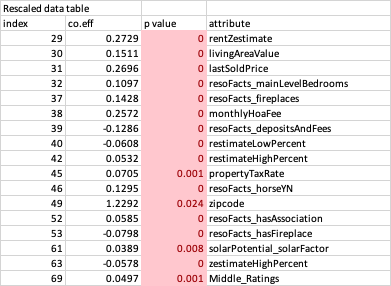

# Numeric data processing without standardisation



In [103]:
for x in num_cols:
    

    s_train = (X_train[x].values.reshape(-1, 1))

    s_test = (X_test[x].values.reshape(-1, 1))

    
    X_train_num_processed= hstack((X_train_num_processed,s_train)).tocsr()
    X_test_num_processed= hstack((X_test_num_processed,s_test)).tocsr()



In [104]:
print(X_train_num_processed.shape)
print(X_test_num_processed.shape)

(1248, 44)
(313, 44)


# Linear Regression

In [105]:
from scipy.sparse import hstack
X_train_processed = hstack((X_train_cat_processed,X_train_num_processed )).tocsr()
X_test_processed = hstack(( X_test_cat_processed,X_test_num_processed)).tocsr()
print(X_test_processed.shape)
print(X_train_processed.shape)

(313, 72)
(1248, 72)


In [106]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_processed, Y_train)
Y_pred = regressor.predict(X_test_processed)

In [107]:
df_out = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_out

,Actual,Predicted
491,1626400.00000,1495019.63877
691,1753184.00000,1345768.69790
35,600139.00000,1008057.69775
1078,1635300.00000,1300284.36505
868,901500.00000,874465.24691
738,935320.00000,924432.67949
210,1428000.00000,1534110.22217
1097,899000.00000,1419325.75719
987,688000.00000,448635.34099
1535,882100.00000,1497245.76551


In [108]:
from sklearn.metrics import r2_score
r2_score =r2_score(Y_test, Y_pred)
rows , col =X_train_processed.shape
adj_R2 = 1- ((1-r2_score) * (rows-1)/(rows-col-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 is:', r2_score.round(4))
print('Adjusted R2 is:', adj_R2.round(3))

R2 is: 0.901
Adjusted R2 is: 0.895


# OLS regresssion

In [109]:
X_train_test_processed=pd.concat([pd.DataFrame(X_train_processed.todense()),
                                  pd.DataFrame(X_test_processed.todense())],
                                 ignore_index=True)

Y_train_test_processed = pd.concat([pd.DataFrame(Y_train),pd.DataFrame(Y_test)], 
                                   ignore_index=True)



In [110]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train_test_processed)
est = sm.OLS(Y_train_test_processed, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              zestimate   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     121.5
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        11:55:07   Log-Likelihood:                -22614.
No. Observations:                1561   AIC:                         4.536e+04
Df Residuals:                    1493   BIC:                         4.573e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1.518e+06   9.02e+05     -1.682      0.0

  data table			
index	co.eff	p value	attribute
29	141.87	0	rentZestimate
30	164.68	0	livingAreaValue
31	0.49	0	lastSoldPrice
32	289900.00	0	resoFacts_mainLevelBedrooms
37	256500.00	0	resoFacts_fireplaces
38	739.72	0	monthlyHoaFee
39	-780.55	0	resoFacts_depositsAndFees
40	-9605.99	0	restimateLowPercent
42	6217.35	0	restimateHighPercent
45	1222000.00	0.001	propertyTaxRate
46	663600.00	0	resoFacts_horseYN
49	3991.14	0.026	zipcode
52	150300.00	0	resoFacts_hasAssociation
53	-191800.00	0	resoFacts_hasFireplace
61	82000.00	0.009	solarPotential_solarFactor
63	-21650.00	0	zestimateHighPercent
69	29640.00	0.001	Middle_Ratings

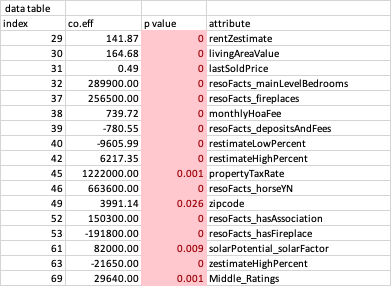